In [164]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

,clas,value,center,new_centers
2,0,-1.396436,-0.04596,-0.879730
3,0,-0.992297,-0.04596,-0.879730
5,0,-0.585725,-0.04596,-0.879730
9,0,-0.544463,-0.04596,-0.879730
7,2,0.100950,-0.04596,0.166233
0,2,0.183906,-0.04596,0.166233
8,2,0.213844,-0.04596,0.166233
6,1,0.776097,-0.04596,0.853541
4,1,0.868621,-0.04596,0.853541
1,1,0.915905,-0.04596,0.853541


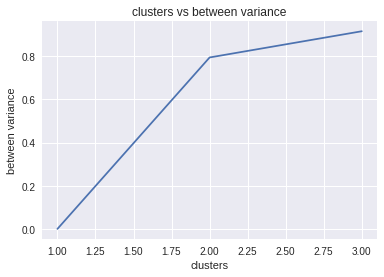

In [163]:
def strata(x,n): # x : this de vector with the values to be cluster; n= maximuin number of clusters
       
    a=list()
    for i in range(len(x)):
        a.append([x[i]])
    
    varb=list()
    for i in np.arange(1,n+1):
        kmeans = KMeans(n_clusters=i, random_state=0).fit(a)
        centroids = kmeans.cluster_centers_ 

        base=pd.DataFrame({'value':alea,'clas':list(kmeans.labels_)})
        base['center']=np.repeat(alea.mean(),len(base))
        #print(base)
        base['new_centers'] = np.array([base[base['clas']==base.iloc[i,]['clas']]['value'].mean() for i in range(len(base))])
        wss=sum((base['value']-base['new_centers'])**2)
        tss=sum((base['value']-base['center'])**2)
        bss=sum((base['new_centers']-base['center'])**2)
        varb.append(float(bss)/float(tss))
        
    plt.plot(np.arange(1,n+1),varb)
    plt.title('clusters vs between variance')
    plt.xlabel('clusters')
    plt.ylabel('between variance')
    
    return base
    
# Example 
    
alea=np.random.normal(0,1,10)    
strae=strata(alea,3)    
strae.sort_values(['value'])